# Import

In [1]:
##%%
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.manifold import TSNE

import torch.nn.functional as F

from tqdm import tqdm

def get_latent(latent_dir):
    latent_files = os.listdir(latent_dir)

    latents = np.zeros((len(latent_files),256))

    latent_paths = []
    
    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path,map_location=torch.device('cpu')).cpu().numpy()
        latents[id_,:] = latent
        latent_paths.append(latent_path)

    return latents, latent_paths

def get_gt_latents(latent_gt_dir, paths):
    paths = [os.path.join(latent_gt_dir, os.path.basename(path)) for path in paths]
    latents = np.zeros((len(paths),256))
    for id_, latent_path in tqdm(enumerate(paths)):
        latent = torch.load(latent_path,map_location=torch.device('cpu')).cpu().numpy()
        latents[id_,:] = latent
    return latents

def plot_latent(latent_dir):
    latent_files = os.listdir(latent_dir)

    latents = np.zeros((len(latent_files),256))

    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path,map_location=torch.device('cpu')).cpu().numpy()
        latents[id_,:] = latent

    plt.imshow(latents, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Heatmap of Concatenated Vectors")
    plt.show()

def vis_latent(latents,norm_min=None,norm_max=None):
    from matplotlib.colors import Normalize
    plt.figure(figsize=(12, 6))
    # 绘制热力图
    plt.subplot(1, 2, 1)  # 1行2列的第1个
    
    norm=None
    if norm_max:
        norm = Normalize(vmin=norm_min, vmax=norm_max)
        plt.imshow(latents, cmap='hot', interpolation='nearest', norm=norm)
    else:
        plt.imshow(latents, cmap='hot', interpolation='nearest')
        
    plt.colorbar()
    plt.title("Heatmap of Concatenated Vectors")

    plt.subplot(1,2,2)
    plt.hist(latents)

    plt.show()

def plot_latent_txt(latent_dir):
    latent_files = os.listdir(latent_dir)

    latents = np.zeros((len(latent_files),768))

    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = np.loadtxt(latent_path).squeeze()
        latents[id_,:] = latent

    plt.imshow(latents, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Heatmap of Concatenated Vectors")
    plt.show()

def plot_latent2(latent_dir):
    latent_files = os.listdir(latent_dir)

    latents = np.zeros((len(latent_files),256))

    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path,map_location=torch.device('cpu')).cpu().numpy()
        latents[id_,:] = latent

    means = np.mean(latents,axis=0)
    std_devs = np.std(latents,axis=0)
    num_elements = latents.shape[1]
    # Plotting bars for means
    positions = np.arange(num_elements)  # X positions for the bars
    plt.bar(positions, means, yerr=std_devs, capsize=5, color='skyblue', ecolor='black', error_kw=dict(lw=1, capthick=1))

    # Adding labels and title
    plt.xlabel('Vector Element')
    plt.ylabel('Value')
    plt.title('Distribution of Each Element Across Vectors (Mean and Standard Deviation)')
    plt.xticks(positions)
    plt.show()
##%%

49it [00:00, 54.06it/s]


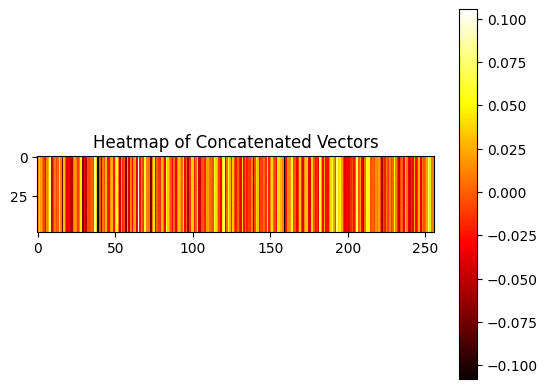

In [2]:
latent_dir = "/home/wiss/lhao/binghui_DONTDELETE_ME/DDIT/DDIT_models_hjp/afterfix_exp_1cl_standard_lr_scheduler_newpretraineddithjpdataorig_diff/test/21/pred_latent"
plot_latent(latent_dir)

456it [00:25, 17.95it/s]


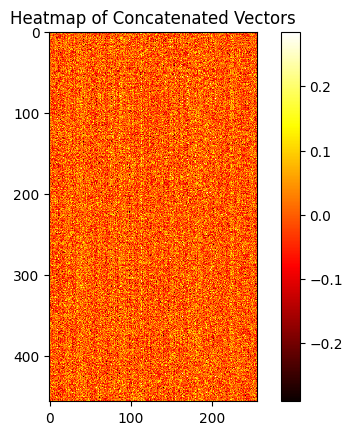

In [3]:
# %%
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_hjppython/LatentCodes/train/2000/canonical_mesh_manifoldplus_python/04256520"
plot_latent(latent_dir)

456it [00:26, 16.93it/s]


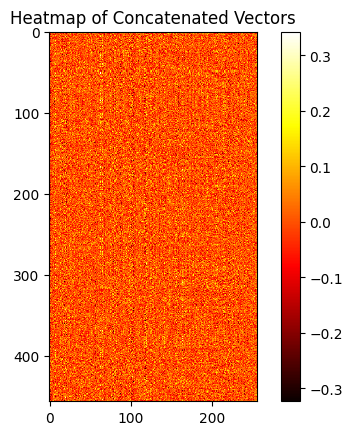

In [4]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_pretrained/LatentCodes/train/1000/canonical_mesh_manifoldplus/04256520"
plot_latent(latent_dir)

40it [00:00, 919.28it/s]


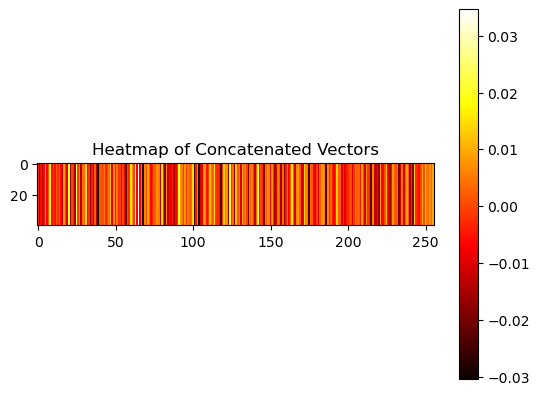

In [7]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond2/output"
plot_latent(latent_dir)

39it [00:00, 350.47it/s]


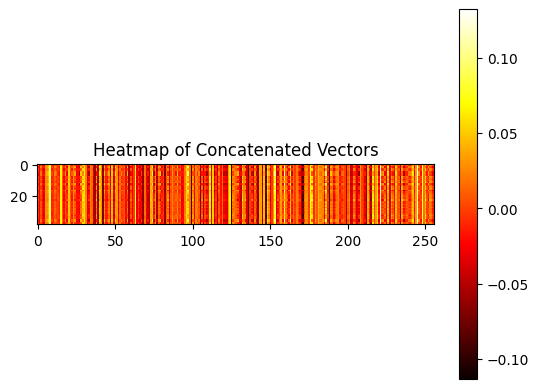

In [2]:
latent_dir = "/home/wiss/lhao/binghui_DONTDELETE_ME/DDIT/DDIT_models_hjp/afterfix_exp_1cl_standard_lr_scheduler_newpretraineddithjpdataorig_diff_pretrained_encoder/test/latest/pred_latent"
plot_latent(latent_dir)

# stage2_diff_uncond2_l1 成功案例

100it [00:33,  3.00it/s]


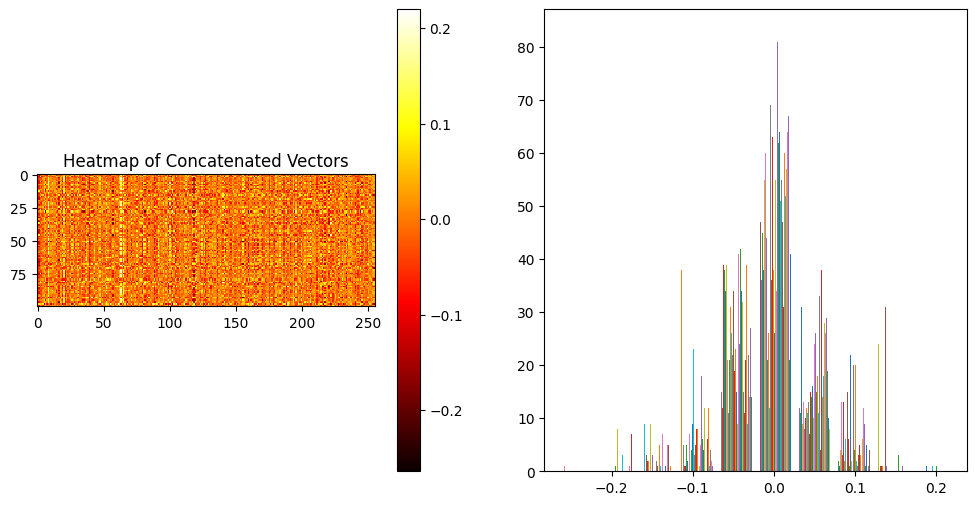

In [2]:
latent_dir="/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond2_l1/output/epoch=43999"
data = get_latent(latent_dir)
vis_latent(data)

## process

In [ ]:
# import os
# output_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond2_l1/output"

# fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# dir_list = sorted(os.listdir(output_root),key=lambda x: int(x.split('=')[1]))

# for i, subdir in (enumerate(dir_list)):

#     latent_dir = os.path.join(output_root, subdir)
#     latent_files = os.listdir(latent_dir)
#     latents = np.zeros((len(latent_files),256))
#     for id_, latent_file in tqdm(enumerate(latent_files)):
#         latent_path = os.path.join(latent_dir, latent_file)
#         latent = torch.load(latent_path,map_location=torch.device('cpu')).cpu().numpy()
#         latents[id_,:] = latent
    
#     ax = axes[int(i/3),i%3]
#     # ax.colorbar()
#     ax.imshow(latents, cmap='hot', interpolation='nearest')
#     ax.set_title(f'Subplot {subdir}')
# plt.colorbar()
# plt.show()

60it [00:00, 375.30it/s]
60it [00:00, 428.15it/s]
60it [00:00, 670.33it/s]
60it [00:00, 167.16it/s]
60it [00:00, 180.14it/s]
60it [00:00, 2356.92it/s]
100it [00:00, 1068.55it/s]


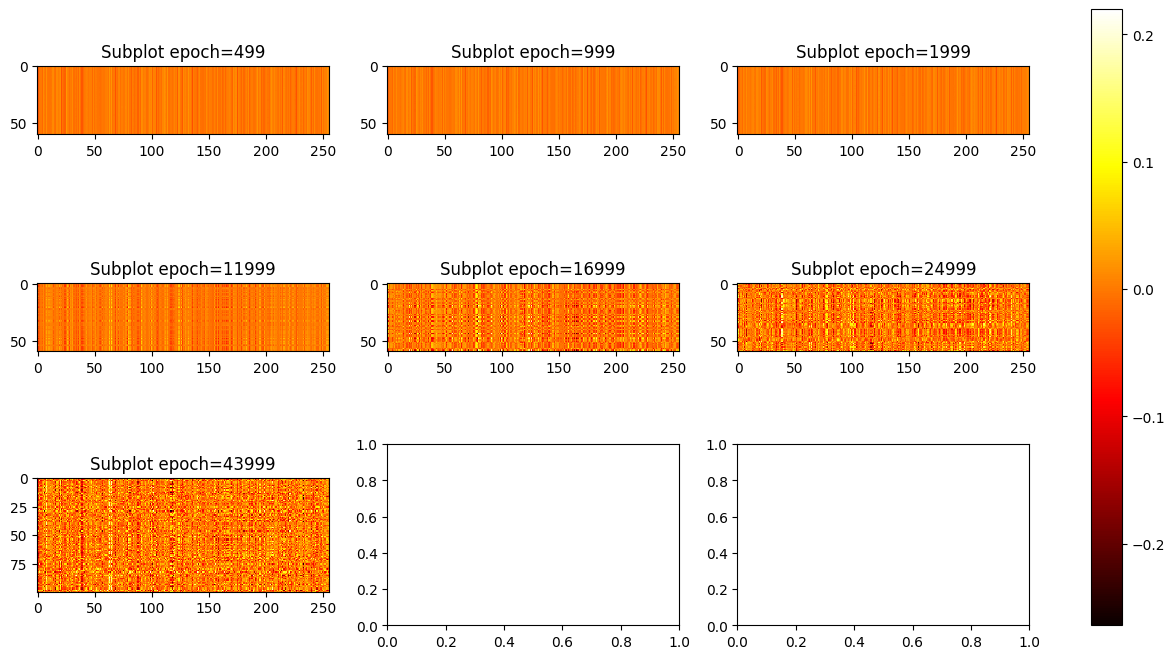

In [11]:
output_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond2_l1/output"

fig, axes = plt.subplots(3, 3, figsize=(16, 8))

dir_list = sorted(os.listdir(output_root), key=lambda x: int(x.split('=')[1]))

# 确定全局最小值和最大值
global_min = np.inf
global_max = -np.inf

for subdir in dir_list:
    latent_dir = os.path.join(output_root, subdir)
    latent_files = os.listdir(latent_dir)
    for latent_file in latent_files:
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path, map_location=torch.device('cpu')).cpu().numpy()
        global_min = min(global_min, np.min(latent))
        global_max = max(global_max, np.max(latent))

# 标准化所有子图的颜色映射
norm = Normalize(vmin=global_min, vmax=global_max)

for i, subdir in enumerate(dir_list):
    latent_dir = os.path.join(output_root, subdir)
    latent_files = os.listdir(latent_dir)
    latents = np.zeros((len(latent_files), 256))
    
    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path, map_location=torch.device('cpu')).cpu().numpy()
        latents[id_, :] = latent
    
    ax = axes[int(i / 3), i % 3]
    im = ax.imshow(latents, cmap='hot', interpolation='nearest', norm=norm)
    ax.set_title(f'Subplot {subdir}')

# 在图形旁边添加统一的颜色条
fig.colorbar(im, ax=axes.ravel().tolist())

# plt.tight_layout()
plt.show()

# GT

456it [00:31, 14.69it/s]


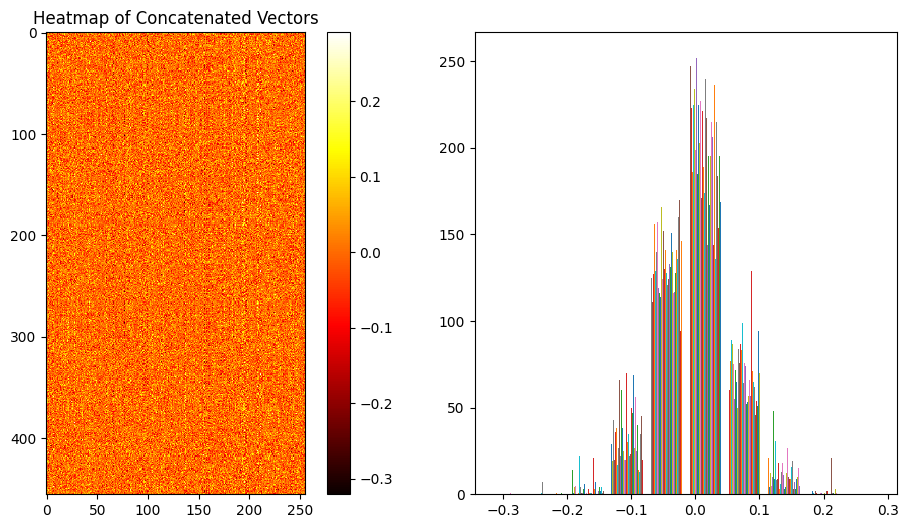

In [44]:
latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"
latents=get_latent(latent_gt_dir)
vis_latent(latents)

# stage2_diff_cond_scanarcw

0it [00:00, ?it/s]

9it [00:00,  9.78it/s]


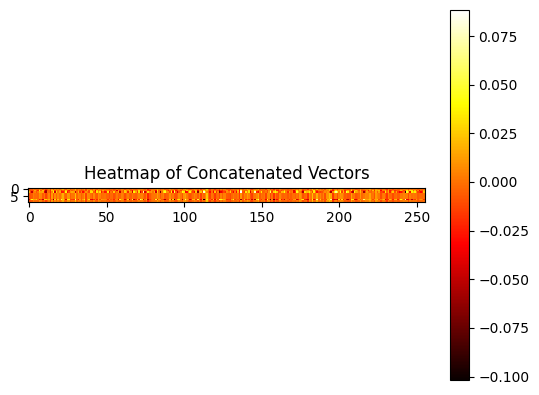

In [5]:
# latent_dir = "/home/wiss/lhao/binghui_DONTDELETE_ME/DDIT/DDIT_models_hjp/afterfix_exp_1cl_standard_lr_scheduler_newpretraineddithjpdataorig_diff_pretrained_encoder/test/latest/pred_latent"
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/2499"
plot_latent(latent_dir)

# stage2_diff_cond_scanarcw

## Process

100it [00:00, 3292.62it/s]
0it [00:00, ?it/s]

100it [00:00, 112.99it/s]
100it [00:00, 3246.16it/s]
100it [00:00, 3180.56it/s]
100it [00:00, 3073.99it/s]
100it [00:00, 3142.67it/s]


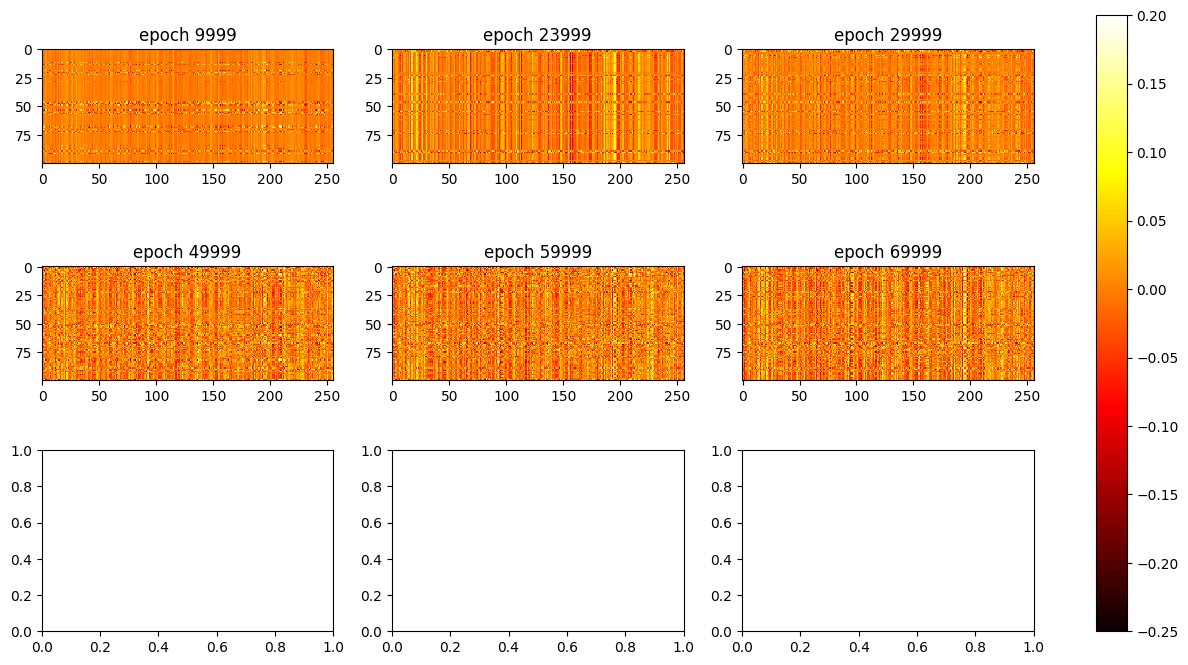

In [6]:
# output_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond2_l1/output"
output_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output"

fig, axes = plt.subplots(3, 3, figsize=(16, 8))

dir_list = sorted(os.listdir(output_root), key=lambda x: int(x))

dir_list = [dir for dir in dir_list if dir in ["9999", "23999", "29999", "49999", "59999", "69999"]]

# 确定全局最小值和最大值
global_min = np.inf
global_max = -np.inf

# for subdir in dir_list:
#     latent_dir = os.path.join(output_root, subdir)
#     latent_files = os.listdir(latent_dir)
#     for latent_file in latent_files:
#         latent_path = os.path.join(latent_dir, latent_file)
#         latent = torch.load(latent_path, map_location=torch.device('cpu')).cpu().numpy()
#         global_min = min(global_min, np.min(latent))
#         global_max = max(global_max, np.max(latent))
# 标准化所有子图的颜色映射
# norm = Normalize(vmin=global_min, vmax=global_max)

norm = Normalize(vmin=-0.25,vmax=0.2)

for i, subdir in enumerate(dir_list):
    latent_dir = os.path.join(output_root, subdir)
    latent_files = os.listdir(latent_dir)
    latents = np.zeros((len(latent_files), 256))
    
    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path, map_location=torch.device('cpu')).cpu().numpy()
        latents[id_, :] = latent
    
    ax = axes[int(i / 3), i % 3]
    im = ax.imshow(latents, cmap='hot', interpolation='nearest', norm=norm)
    ax.set_title(f'epoch {subdir}')

# 在图形旁边添加统一的颜色条
fig.colorbar(im, ax=axes.ravel().tolist())

# plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'abs(error) of pred and gt')

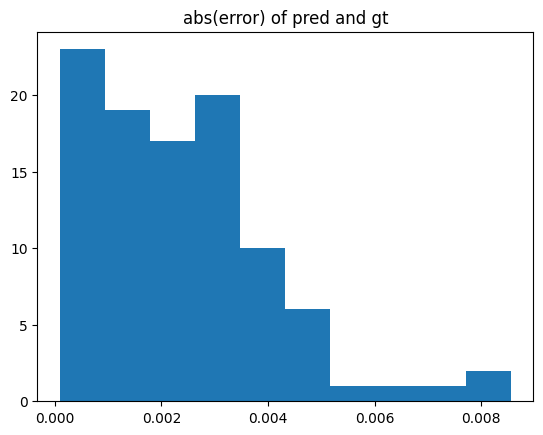

In [6]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output"
latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"

all_loss = np.zeros(len(os.listdir(latent_dir)))

for i, latent in enumerate(os.listdir(latent_dir)):
    latent_path = os.path.join(latent_dir,latent)
    latent_gt_path = os.path.join(latent_gt_dir,latent)
    latent_gt_path
    # print(latent_path)
    latent_pred = torch.load(latent_path,map_location="cpu")
    latent_gt = torch.load(latent_gt_path,map_location="cpu")
    mse = (latent_gt - latent_pred).mean()
    all_loss[i] = mse.numpy()
    # print(mse)

plt.hist(np.abs(all_loss))
plt.title("abs(error) of pred and gt")

In [16]:
# latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output"
# latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"

# all_loss = np.zeros([len(os.listdir(latent_dir)),256])

# for i, latent in enumerate(os.listdir(latent_dir)):
#     latent_path = os.path.join(latent_dir,latent)
#     latent_gt_path = os.path.join(latent_gt_dir,latent)
#     # print(latent_path)
#     latent_pred = torch.load(latent_path,map_location="cpu")
#     latent_gt = torch.load(latent_gt_path,map_location="cpu")
#     mse = latent_gt
#     all_loss[i,:] = mse.numpy()
#     # print(mse)

# plt.hist(all_loss)
# plt.title("latent gt")

Text(0.5, 1.0, 'stage2_diff_cond_scanarcw pred')

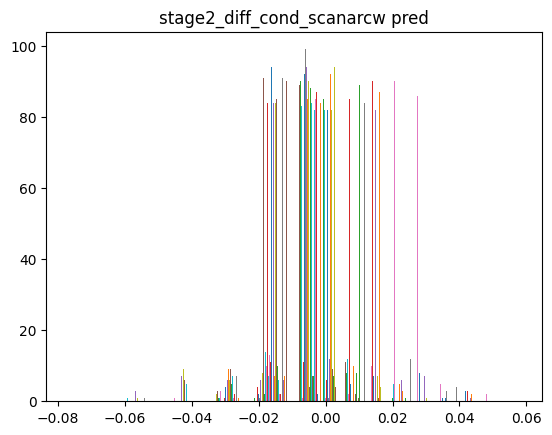

In [12]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output"
latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"

all_loss = np.zeros([len(os.listdir(latent_dir)),256])

for i, latent in enumerate(os.listdir(latent_dir)):
    latent_path = os.path.join(latent_dir,latent)
    latent_gt_path = os.path.join(latent_gt_dir,latent)
    # print(latent_path)
    latent_pred = torch.load(latent_path,map_location="cpu")
    latent_gt = torch.load(latent_gt_path,map_location="cpu")
    mse = latent_pred
    all_loss[i,:] = mse.numpy()
    # print(mse)

plt.hist(all_loss)
plt.title("stage2_diff_cond_scanarcw pred")

In [ ]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output"
latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"

all_loss = np.zeros(len(os.listdir(latent_dir)))

for i, latent in enumerate(os.listdir(latent_dir)):
    latent_path = os.path.join(latent_dir,latent)
    latent_gt_path = os.path.join(latent_gt_dir,latent)
    latent_gt_path 
    # print(latent_path)
    latent_pred = torch.load(latent_path,map_location="cpu")
    latent_gt = torch.load(latent_gt_path,map_location="cpu")
    mse = (latent_pred)
    all_loss[i] = mse.numpy()
    # print(mse)

plt.hist(all_loss)

100it [00:00, 2411.52it/s]


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.000091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.135117
[t-SNE] KL divergence after 5000 iterations: 0.772884


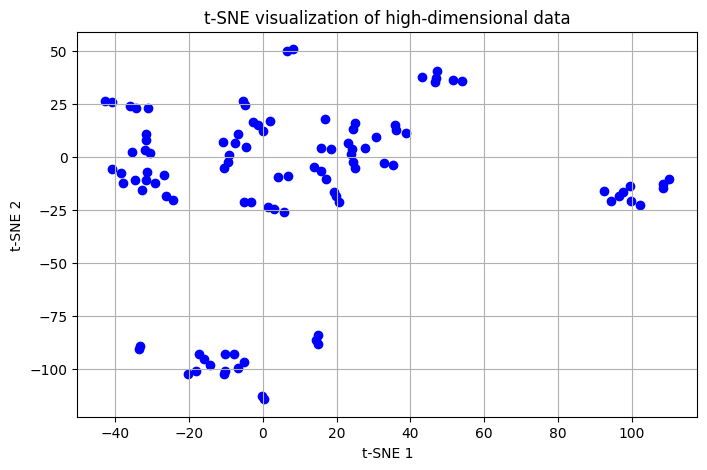

In [22]:
data = get_latent(latent_dir)

# # 假设数据
# N = 100  # 假设有100个数据点
# data = np.random.rand(N, 256)  # 生成随机数据作为示例

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=5000)
tsne_results = tsne.fit_transform(data)

# 可视化结果
plt.figure(figsize=(8, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue')
plt.title('t-SNE visualization of high-dimensional data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

## noncond

In [ ]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/499/nocond"
latents = get_latent(latent_dir)

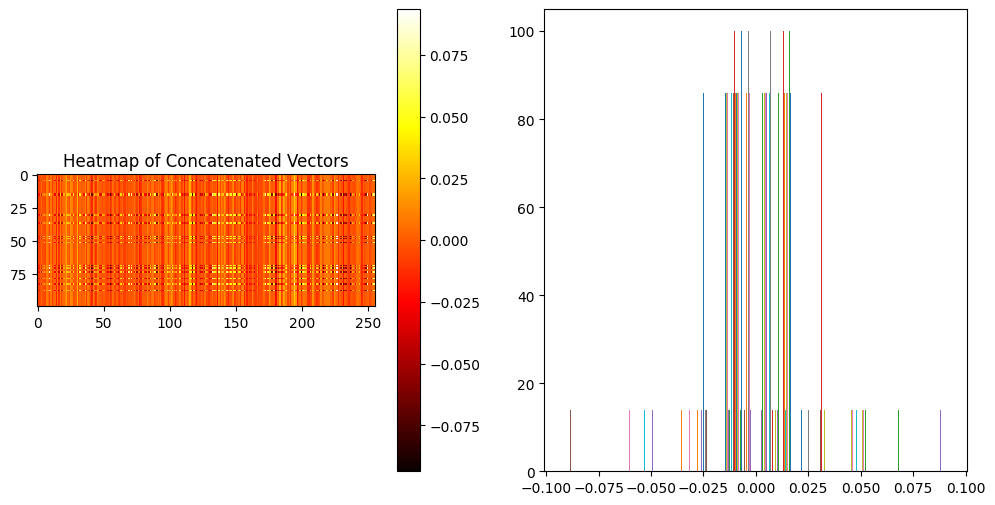

In [41]:
vis_latent(latents)

## 11999

100it [00:00, 220.28it/s]


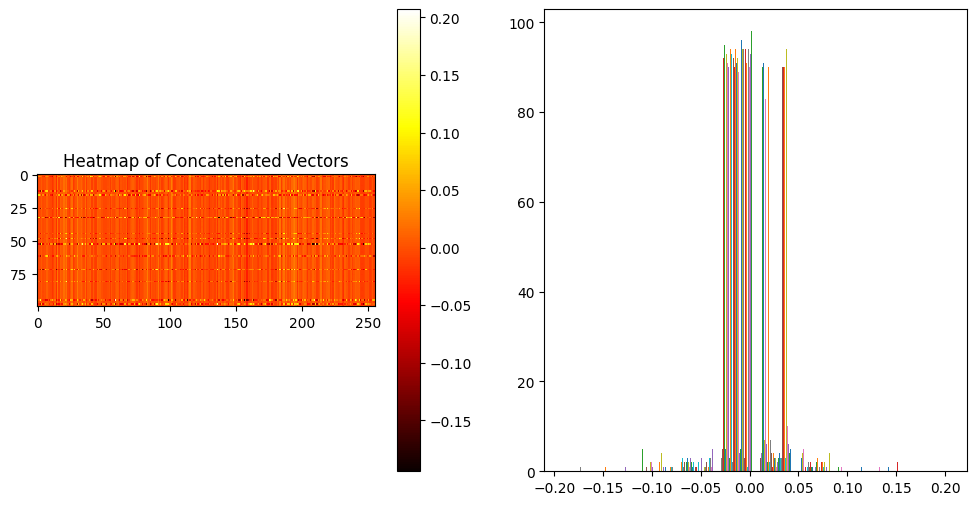

In [42]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/11999"
latents=get_latent(latent_dir)
vis_latent(latents)

## 16999

100it [00:00, 407.25it/s]


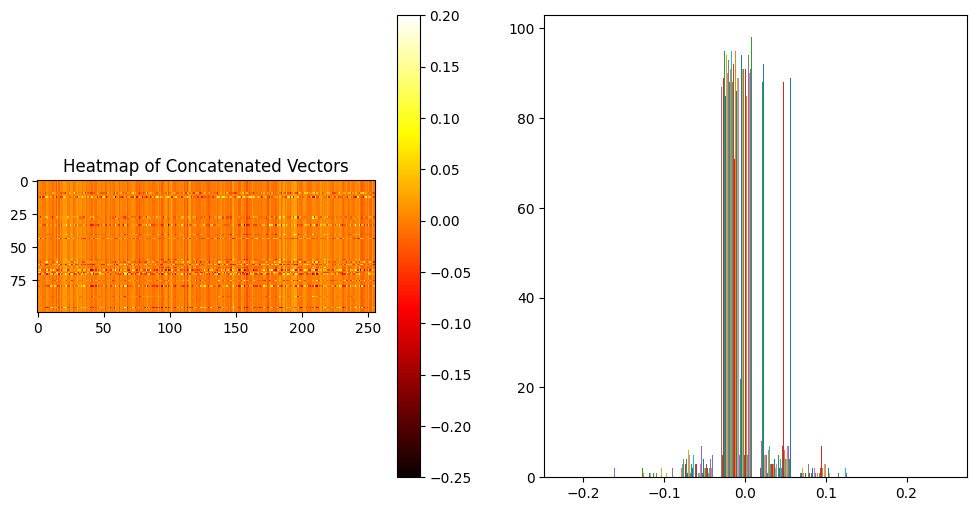

In [17]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/16999"
data = get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 23999

100it [00:00, 103.59it/s]


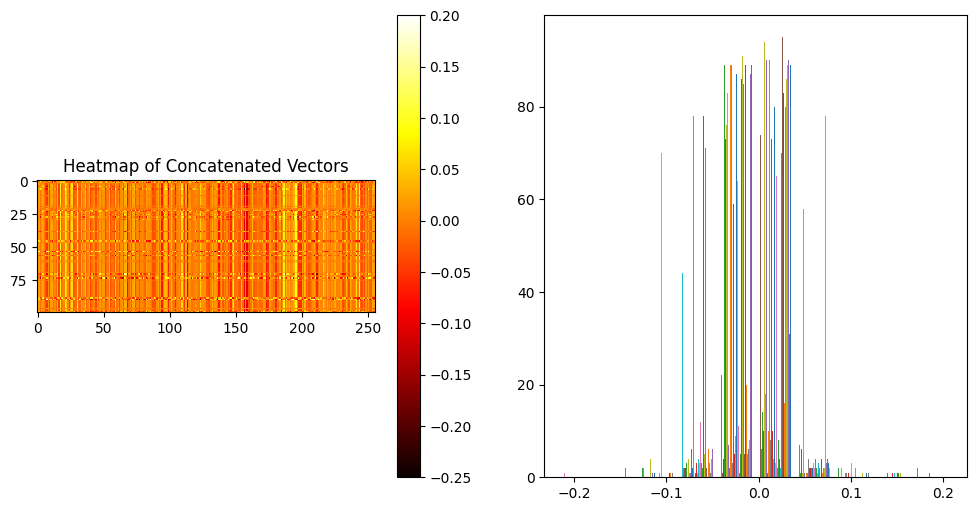

In [19]:
latent_dir="/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/23999"
data = get_latent(latent_dir)
# vis_latent(data,norm_min=-0.25,norm_max=0.2)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 24999

0it [00:00, ?it/s]

100it [00:00, 186.48it/s]


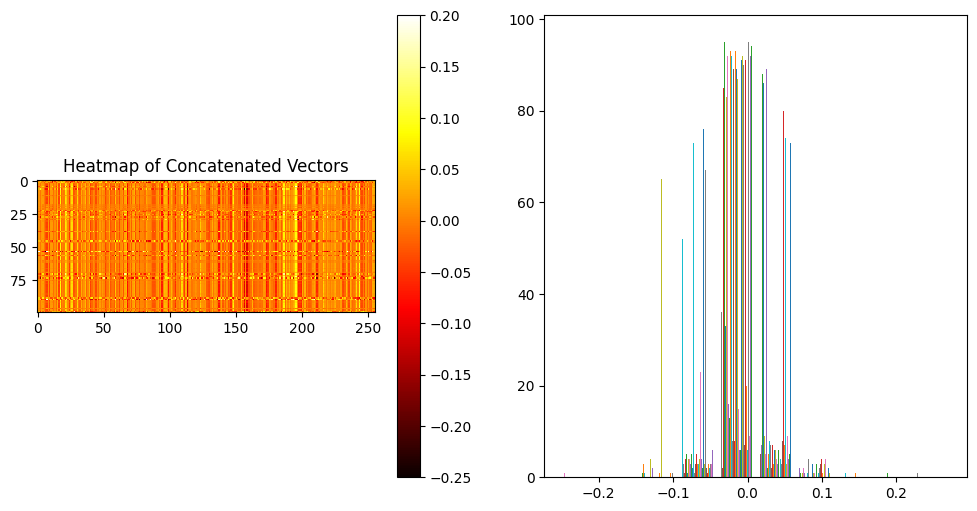

In [22]:
latent_dir="/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/24999"
data = get_latent(latent_dir)
# vis_latent(data,norm_min=-0.25,norm_max=0.2)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 25999

100it [00:08, 11.33it/s]


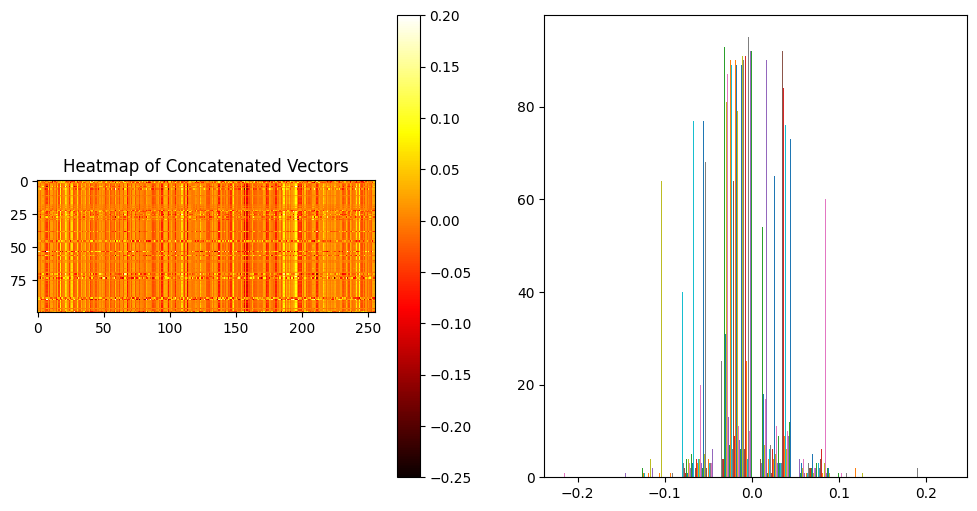

In [13]:
latent_dir="/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/25999"
data = get_latent(latent_dir)
# vis_latent(data,norm_min=-0.25,norm_max=0.2)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 26999

0it [00:00, ?it/s]

100it [00:03, 32.46it/s]


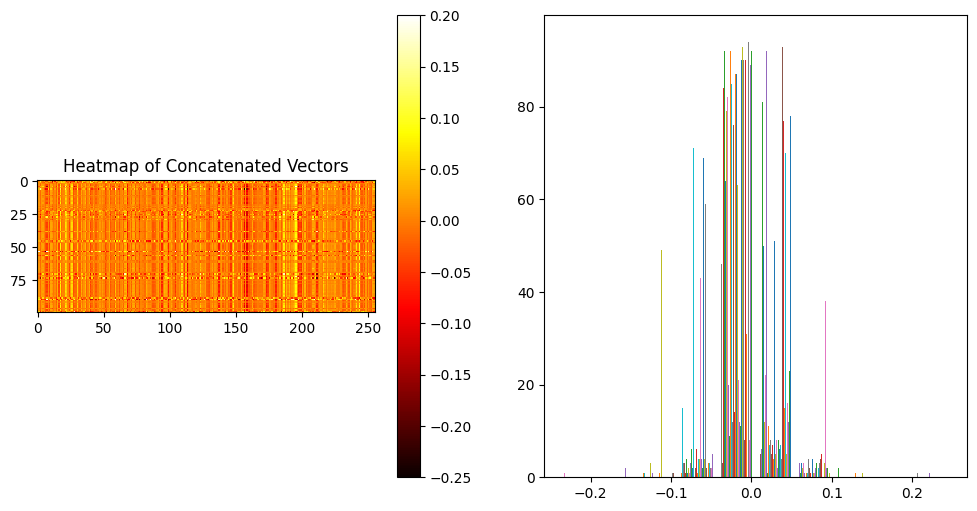

In [8]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/26999"
data = get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 27999

100it [00:00, 164.97it/s]


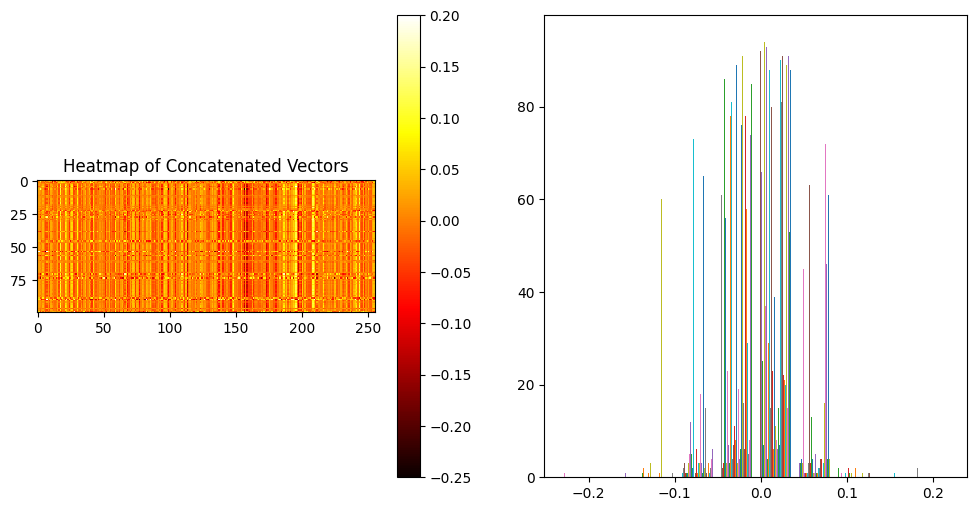

In [44]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/27999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

100it [00:00, 287.04it/s]


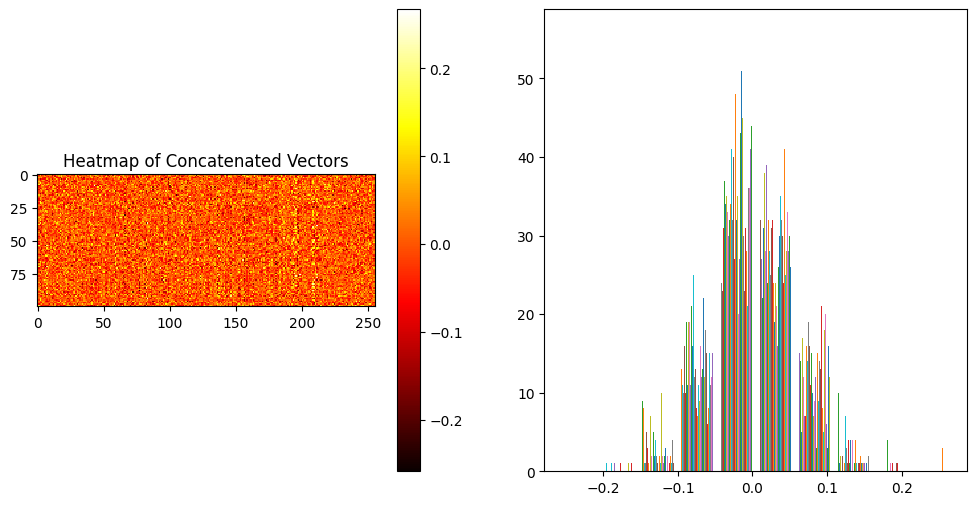

In [38]:
latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"
# paths = [os.path.join(latent_gt_dir, os.path.basename(path)) for path in paths]
# latents = np.zeros((len(paths),256))
# for id_, latent_path in tqdm(enumerate(paths)):
#     latent = torch.load(latent_path,map_location=torch.device('cpu')).cpu().numpy()
#     latents[id_,:] = latent
# vis_latent(latents)
gts = get_gt_latents(latent_gt_dir=latent_gt_dir, paths=paths)
vis_latent(gts)

## 28999

0it [00:00, ?it/s]

100it [00:03, 33.11it/s]


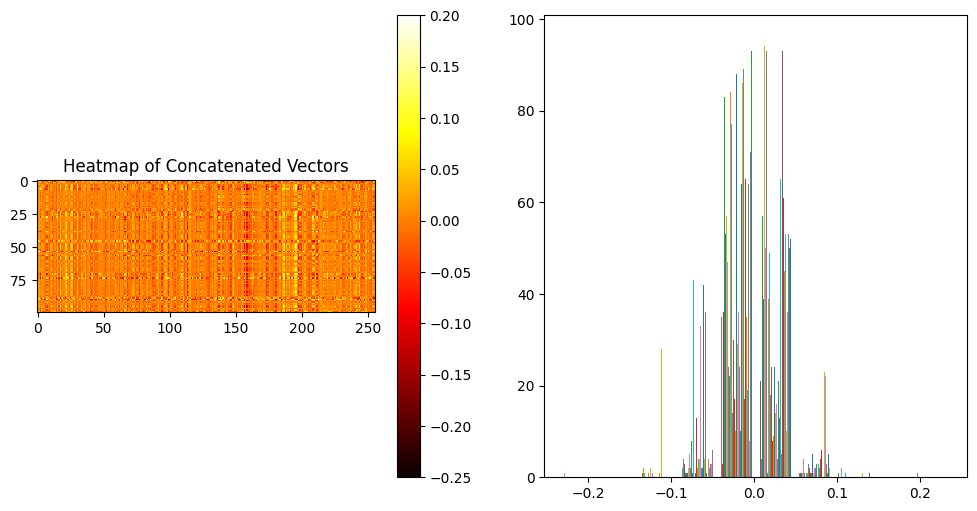

In [48]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/28999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 29999

100it [00:00, 124.92it/s]


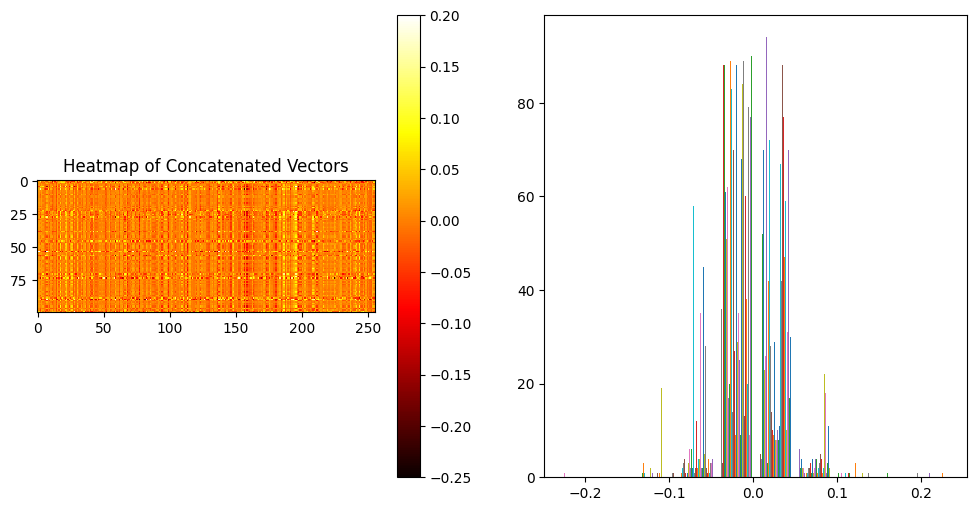

In [56]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/29999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 30999
b70*4

100it [00:42,  2.38it/s]


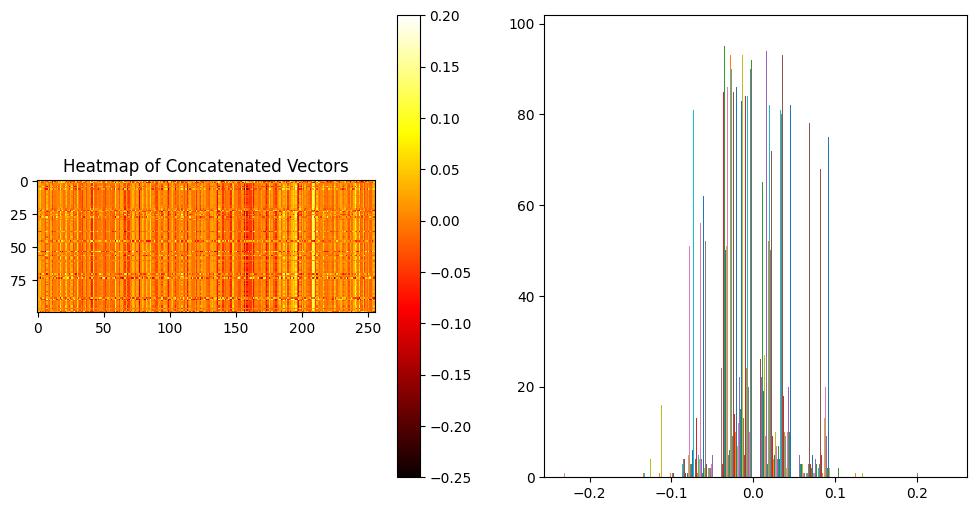

In [4]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_4times420_b280/output/30999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 33999

0it [00:00, ?it/s]

100it [00:01, 87.34it/s] 


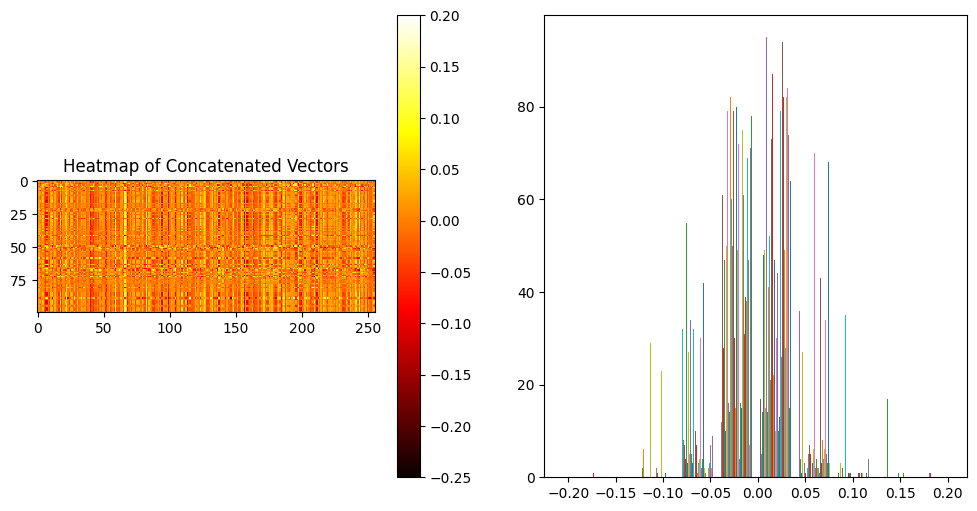

In [8]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/33999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 34999

0it [00:00, ?it/s]

100it [00:00, 123.95it/s]


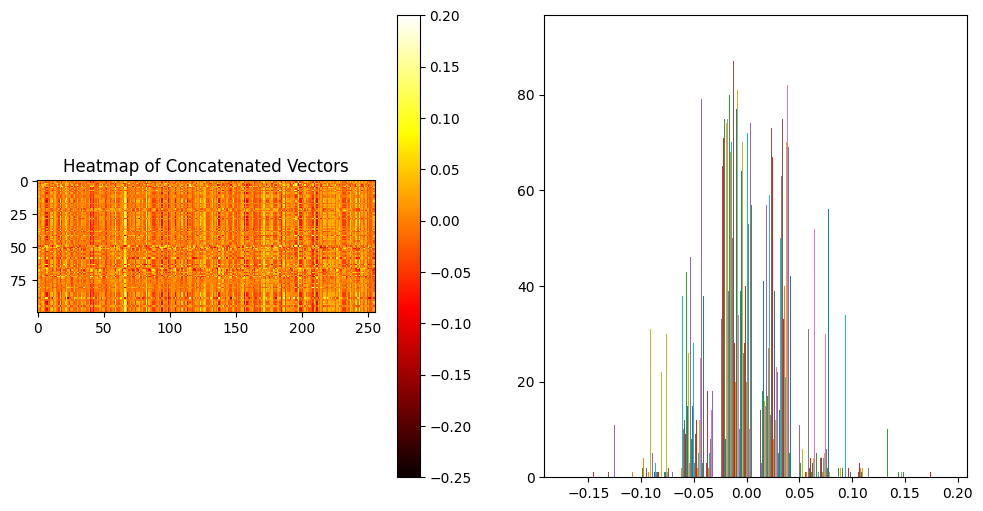

In [9]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/34999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 49999

100it [00:34,  2.91it/s]


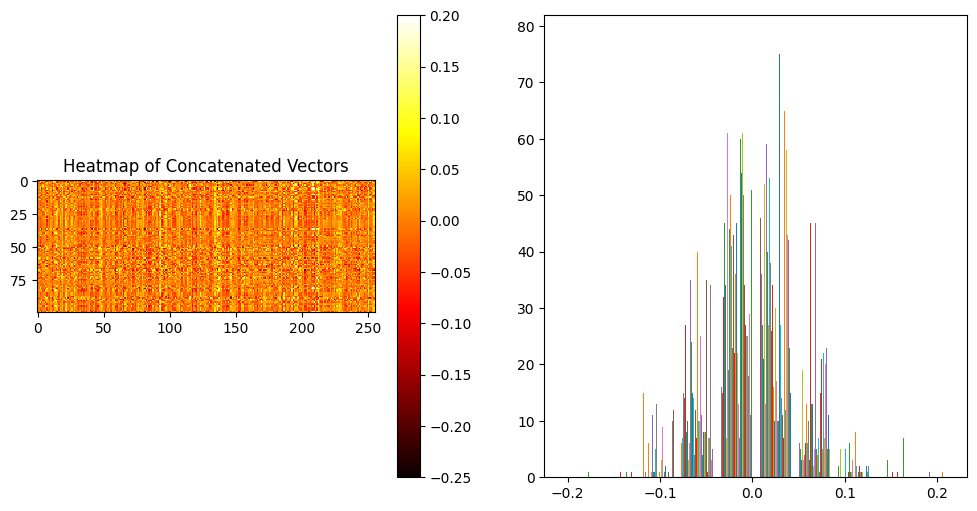

In [3]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/49999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 53999

0it [00:00, ?it/s]

100it [00:00, 193.55it/s]


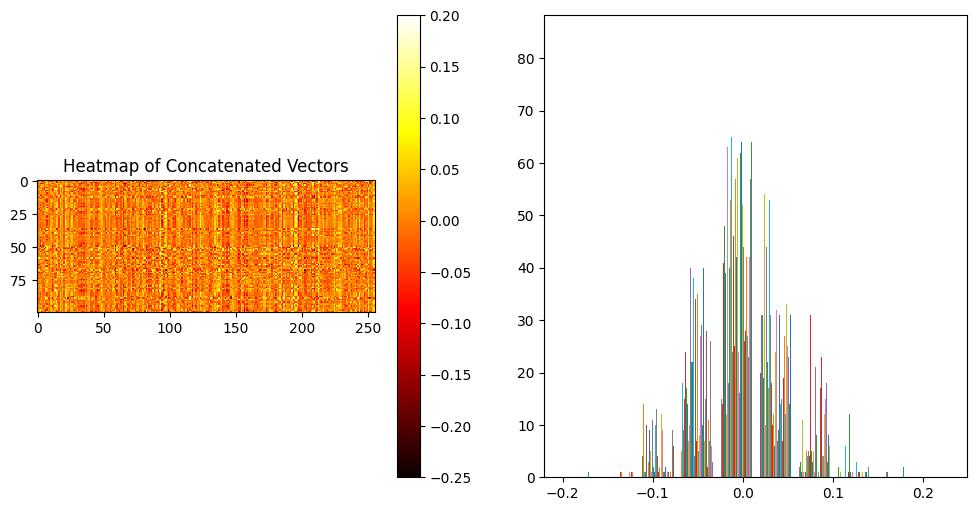

In [4]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/52999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 56999

100it [00:01, 81.74it/s]


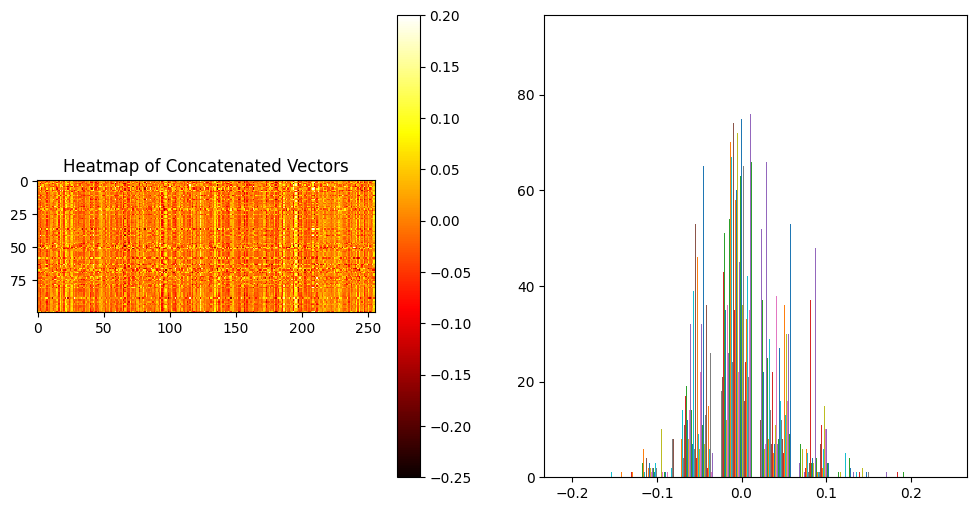

In [11]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/56999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 59999

100it [00:46,  2.17it/s]


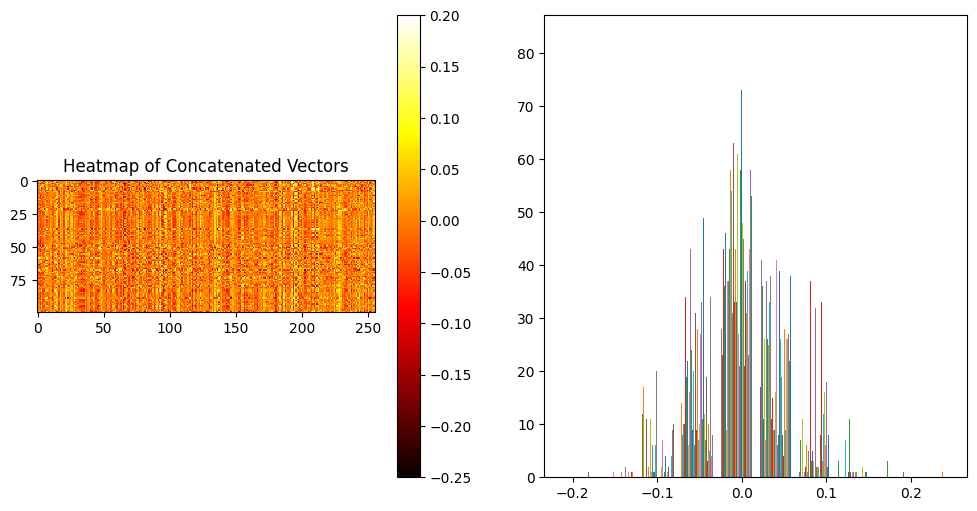

In [14]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/59999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 63999

100it [00:00, 182.10it/s]


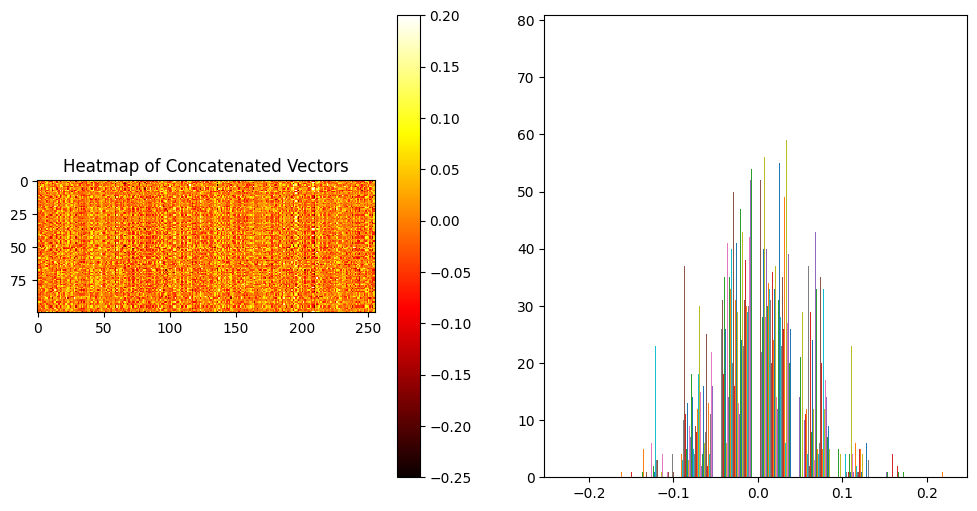

In [23]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/63999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 66999

100it [00:54,  1.85it/s]


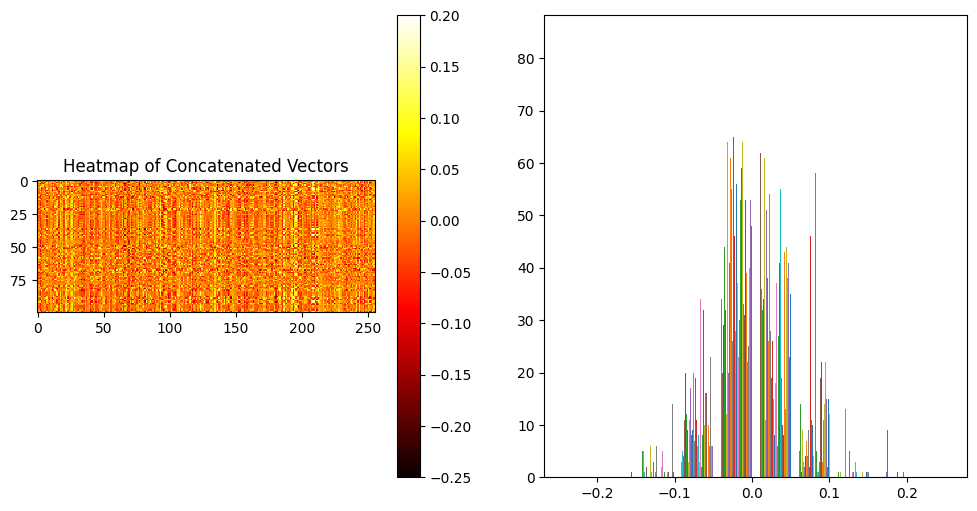

In [2]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/66999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## 69999

449it [00:09, 48.02it/s]


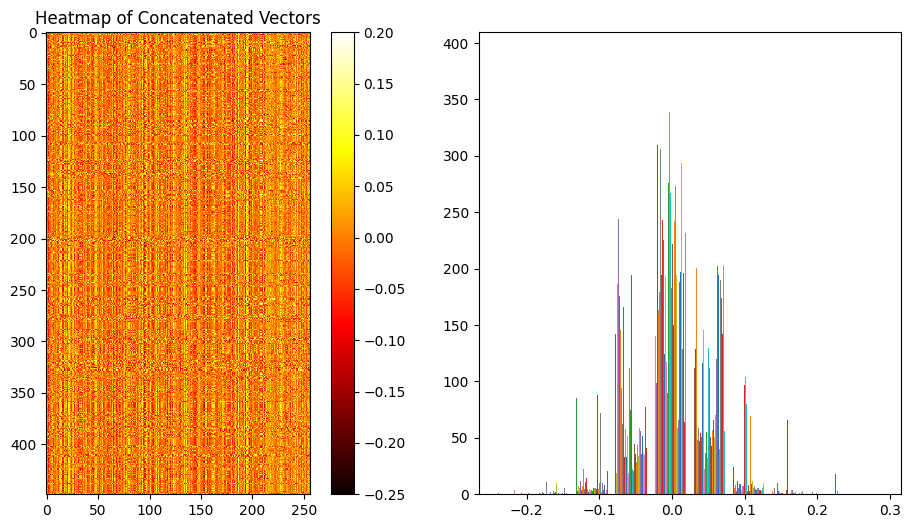

In [2]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/output/69999"
data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

## GT

100it [00:52,  1.89it/s]


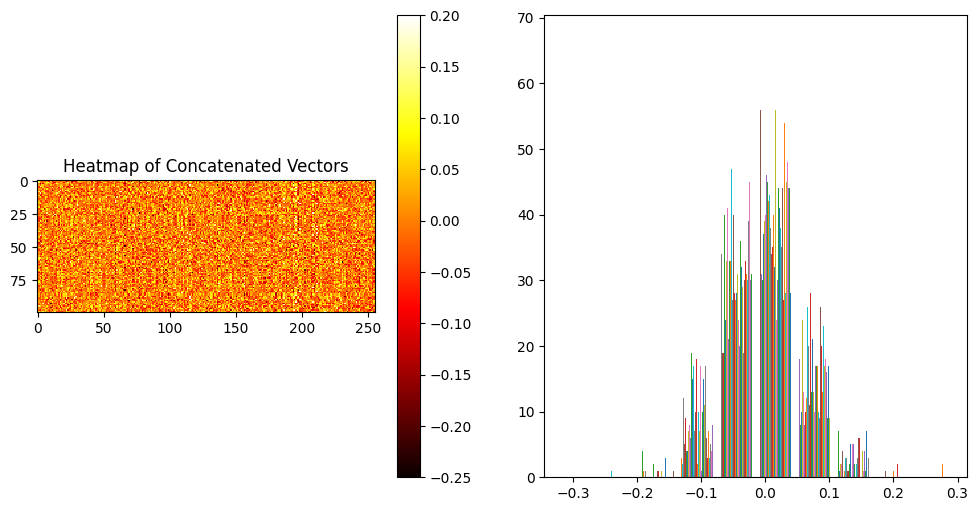

In [5]:
latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"
# paths = [os.path.join(latent_gt_dir, os.path.basename(path)) for path in paths]
# latents = np.zeros((len(paths),256))
# for id_, latent_path in tqdm(enumerate(paths)):
#     latent = torch.load(latent_path,map_location=torch.device('cpu')).cpu().numpy()
#     latents[id_,:] = latent
# vis_latent(latents)
gts = get_gt_latents(latent_gt_dir=latent_gt_dir, paths=paths)
vis_latent(gts,norm_min=-0.25,norm_max=0.2)

# 1e-4 

100it [00:19,  5.23it/s]


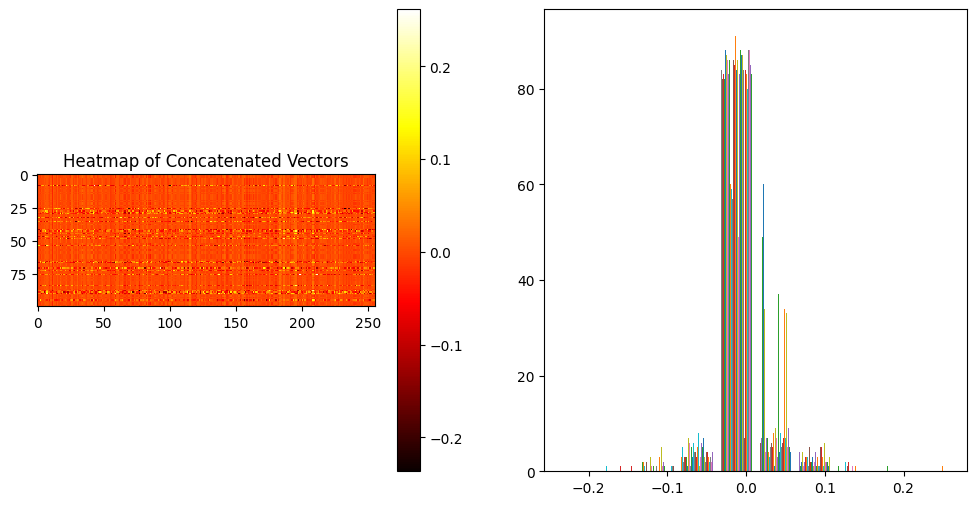

In [2]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_l1_1e-4_nonperturb_b70/output/12999"
data = get_latent(latent_dir)
vis_latent(data)

# stage2_diff_cond_scanarcw_sinl1

## 399

100it [00:07, 13.03it/s]


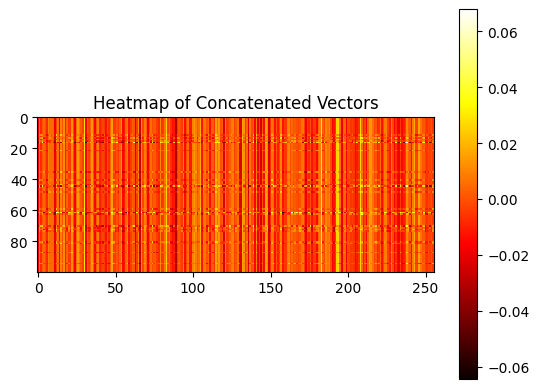

In [15]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_sinl1/output/399"
plot_latent(latent_dir)

100it [00:06, 15.30it/s]


(array([[1., 2., 7., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 2., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.06416497, -0.05096117, -0.03775737, -0.02455358, -0.01134978,
         0.00185401,  0.01505781,  0.02826161,  0.0414654 ,  0.0546692 ,
         0.06787299]),
 <a list of 256 BarContainer objects>)

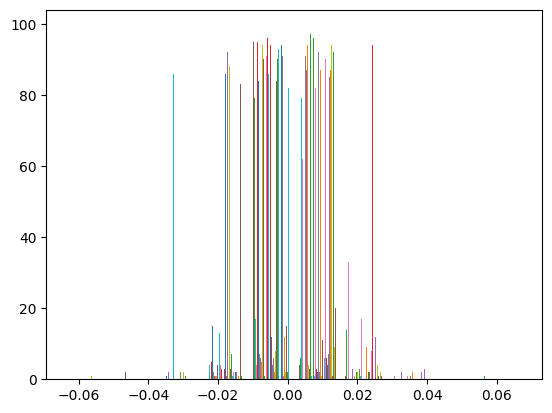

In [16]:
data = get_latent(latent_dir)
plt.hist(data)

## 3599

100it [00:00, 265.05it/s]


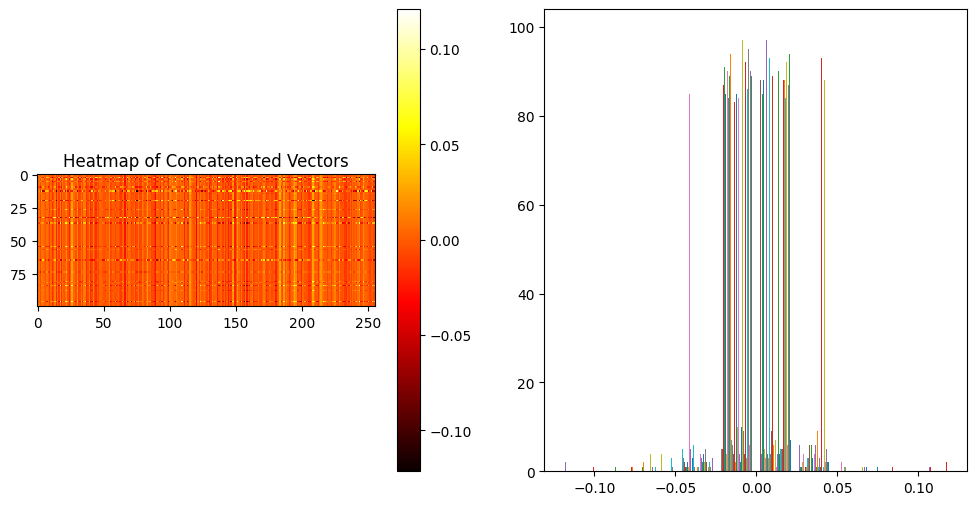

In [41]:
latent_dir="/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_sinl1/output/3599"
data, paths = get_latent(latent_dir)
vis_latent(data)

100it [00:01, 93.28it/s]


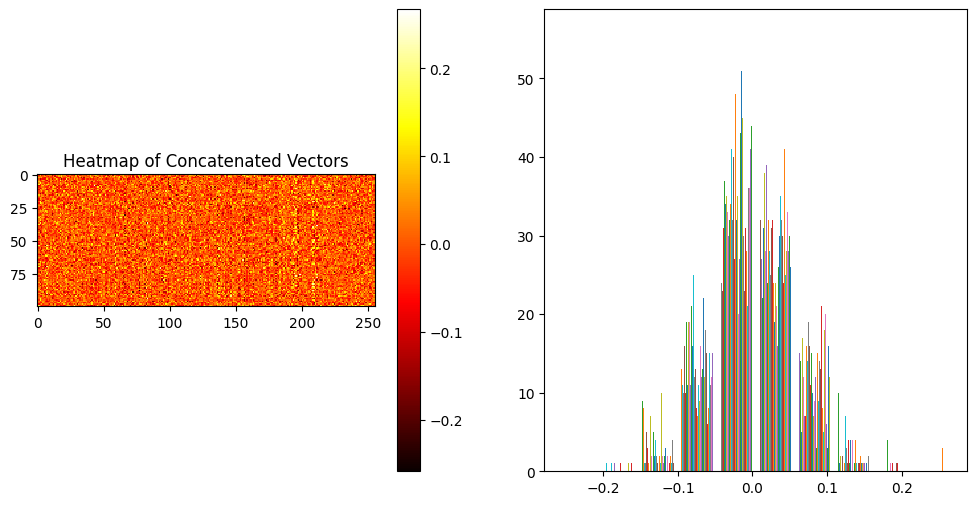

In [43]:
gts = get_gt_latents(latent_gt_dir,paths)
vis_latent(gts)

# stage2_diff_cond_scanarcw3

75it [00:02, 33.28it/s]


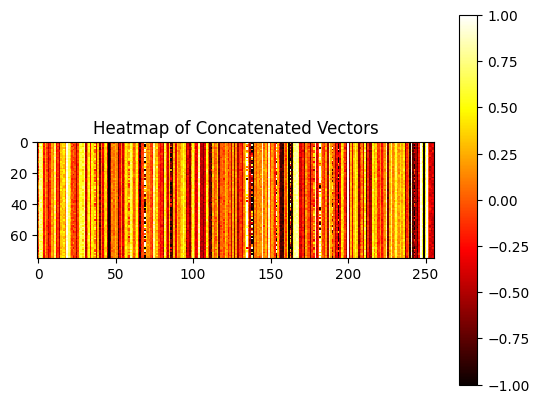

In [8]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw3/output/24999"
latent_gt_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520"
plot_latent(latent_dir)
# all_loss = np.zeros(len(os.listdir(latent_dir)))

# for i, latent in enumerate(os.listdir(latent_dir)):
#     latent_path = os.path.join(latent_dir,latent)
#     latent_gt_path = os.path.join(latent_gt_dir,latent)
#     latent_gt_path 
#     # print(latent_path)
#     latent_pred = torch.load(latent_path,map_location="cpu")
#     latent_gt = torch.load(latent_gt_path,map_location="cpu")
#     mse = (latent_gt - latent_pred).mean()
#     all_loss[i] = mse.numpy()
#     # print(mse)

# plt.hist(np.abs(all_loss))

0it [00:00, ?it/s]

456it [00:42, 10.64it/s]


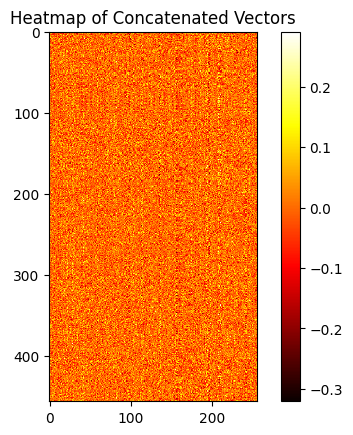

In [10]:
plot_latent(latent_gt_dir)

# stage2_diff_cond_scanarcw3

75it [00:03, 24.03it/s]


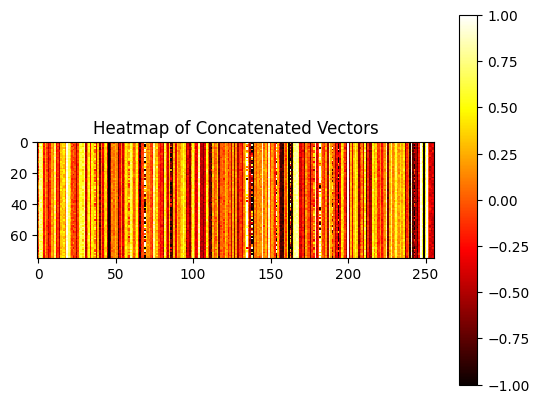

In [31]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw3/output/24999"
plot_latent(latent_dir)

# stage2_diff_cond_scanarcw7

26it [00:00, 2747.25it/s]


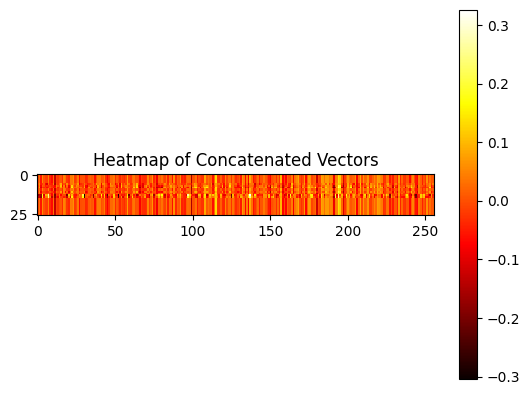

In [19]:
latent_dir="/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw7/output/499"
plot_latent(latent_dir)

Text(0.5, 1.0, 'stage2_diff_cond_scanarcw pred')

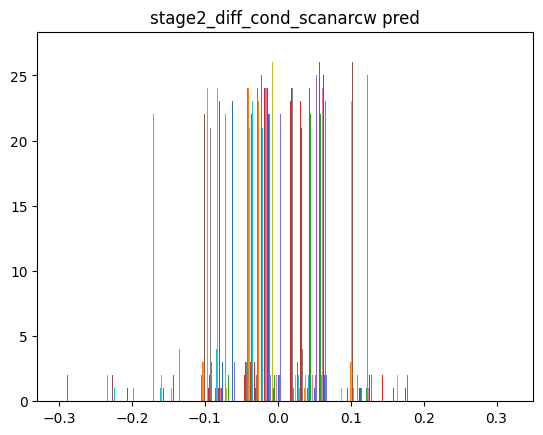

In [20]:
all_loss = np.zeros([len(os.listdir(latent_dir)),256])

for i, latent in enumerate(os.listdir(latent_dir)):
    latent_path = os.path.join(latent_dir,latent)
    latent_gt_path = os.path.join(latent_gt_dir,latent)
    # print(latent_path)
    latent_pred = torch.load(latent_path,map_location="cpu")
    mse = latent_pred
    all_loss[i,:] = mse.numpy()
    # print(mse)

plt.hist(all_loss)
plt.title("stage2_diff_cond_scanarcw pred")

# stage2_diff_cond_scanarcw9
dataset length 18 cos+l1

18it [00:00, 105.95it/s]


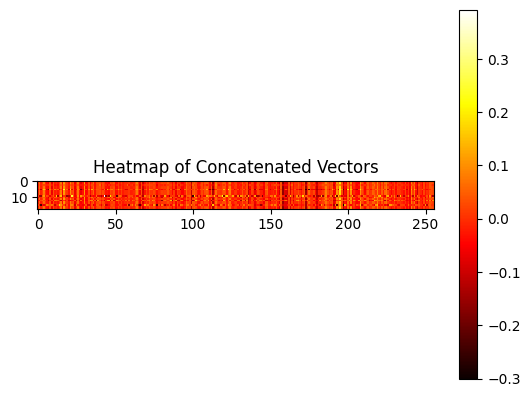

In [21]:
latent_dir="/storage/user/lhao/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw9/output/ckpt"
plot_latent(latent_dir=latent_dir)

Text(0.5, 1.0, 'stage2_diff_cond_scanarcw pred')

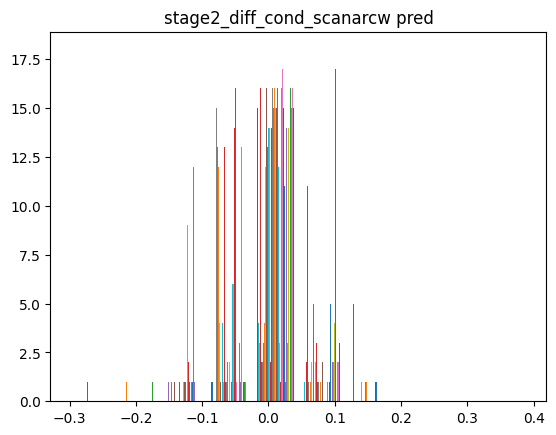

In [22]:
all_loss = np.zeros([len(os.listdir(latent_dir)),256])

for i, latent in enumerate(os.listdir(latent_dir)):
    latent_path = os.path.join(latent_dir,latent)
    latent_gt_path = os.path.join(latent_gt_dir,latent)
    # print(latent_path)
    latent_pred = torch.load(latent_path,map_location="cpu")
    mse = latent_pred
    all_loss[i,:] = mse.numpy()
    # print(mse)

plt.hist(all_loss)
plt.title("stage2_diff_cond_scanarcw pred")

# stage2_diff_cond_scanarcw10

100it [00:00, 3033.00it/s]


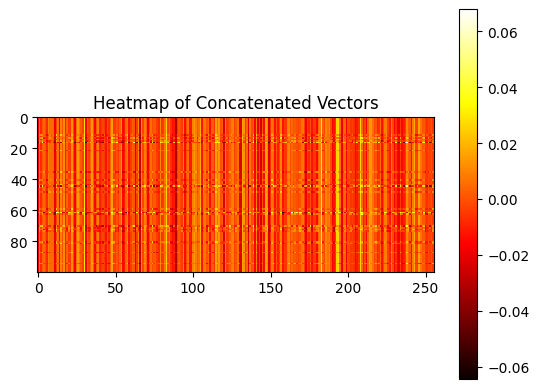

In [34]:
# sinl1
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw10/output/399"
plot_latent(latent_dir)

Text(0.5, 1.0, 'stage2_diff_cond_scanarcw pred')

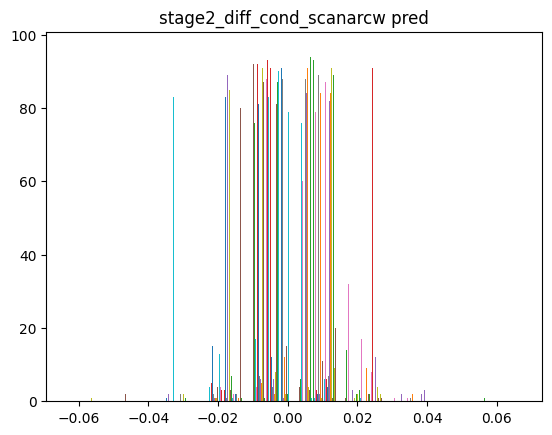

In [33]:
all_loss = np.zeros([len(os.listdir(latent_dir)),256])

for i, latent in enumerate(os.listdir(latent_dir)):
    latent_path = os.path.join(latent_dir,latent)
    latent_gt_path = os.path.join(latent_gt_dir,latent)
    # print(latent_path)
    latent_pred = torch.load(latent_path,map_location="cpu")
    mse = latent_pred
    all_loss[i,:] = mse.numpy()
    # print(mse)

plt.hist(all_loss)
plt.title("stage2_diff_cond_scanarcw pred")

0it [00:00, ?it/s]

43it [00:00, 48.82it/s] 


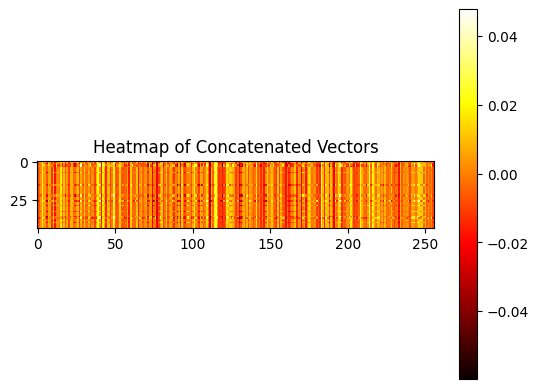

In [4]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_l1_pc1024/output/last"
plot_latent(latent_dir)

# stage2_diff_cond_scanarcw_l1_pc1024

23it [00:00, 24.26it/s]


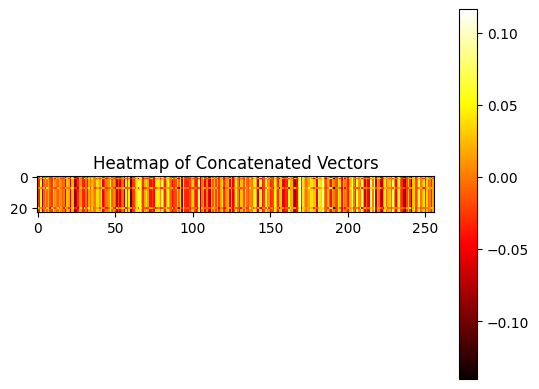

In [6]:
# /home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_l1_pc1024/output/last
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_l1_pc1024/output/last"
plot_latent(latent_dir)

# stage2_diff_cond_scanarcw_sinl1_pc1024_10times42

10it [00:01,  9.57it/s]


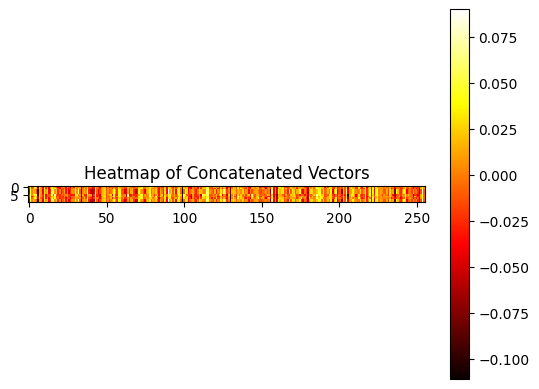

In [6]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_sinl1_pc1024_10times42/output/last"
latent_gt_dir = ""
plot_latent(latent_dir)

Text(0.5, 1.0, 'stage2_diff_cond_scanarcw pred')

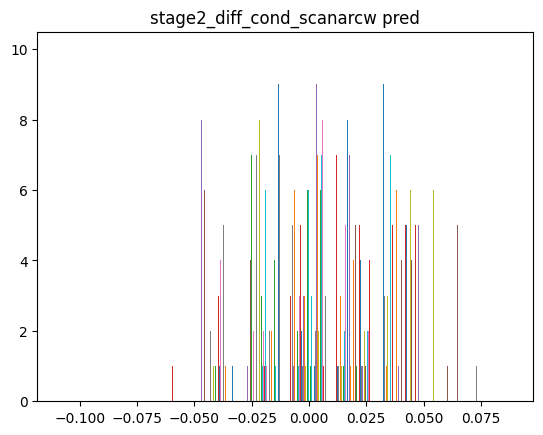

In [8]:
all_loss = np.zeros([len(os.listdir(latent_dir)),256])

for i, latent in enumerate(os.listdir(latent_dir)):
    latent_path = os.path.join(latent_dir,latent)
    # print(latent_path)
    latent_pred = torch.load(latent_path,map_location="cpu")
    mse = latent_pred
    all_loss[i,:] = mse.numpy()
    # print(mse)

plt.hist(all_loss)
plt.title("stage2_diff_cond_scanarcw pred")

# stage2_diff_cond_scanarcw_l1_pc1024_10times42

10it [00:03,  2.62it/s]


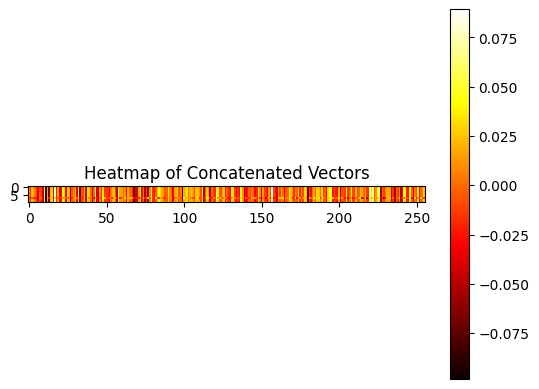

In [5]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_l1_pc1024_10times42/output/last"
plot_latent(latent_dir)

10it [00:00, 15.60it/s]


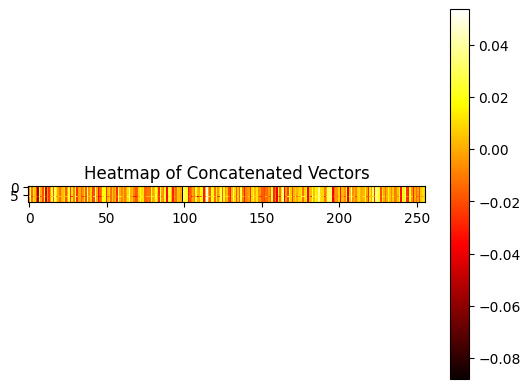

In [2]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_sinl1_pc1024_10times42_nonperturb/output/499"
plot_latent(latent_dir)

# stage2_diff_cond_scanarcw_l1_1e-4_nonperturb_b70

0it [00:00, ?it/s]

100it [00:01, 81.86it/s]


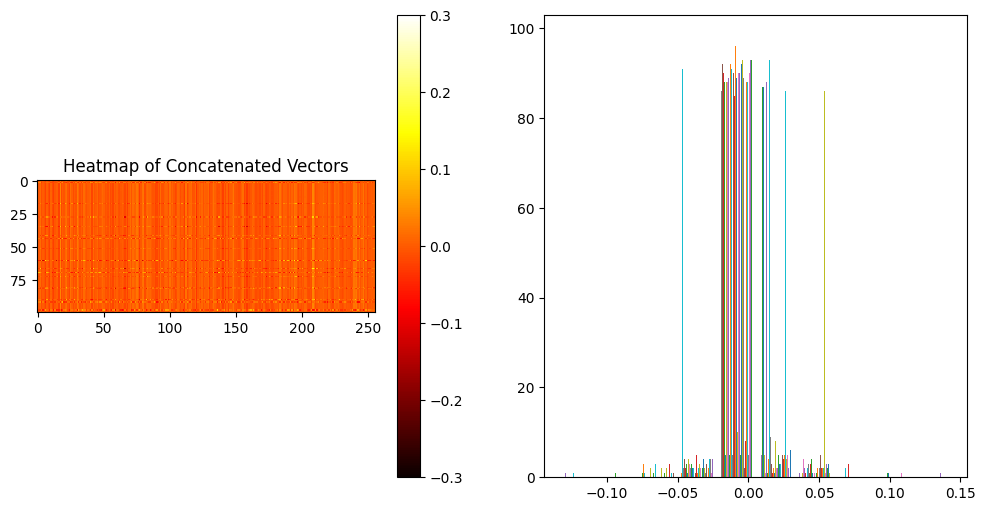

In [13]:
latent_dir="/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw_l1_1e-4_nonperturb_b70/output/2999"
latents = get_latent(latent_dir)
vis_latent(latents,norm_min=-0.3,norm_max=0.3)

# ddit_stage2_diff_cond

449it [00:14, 30.55it/s]


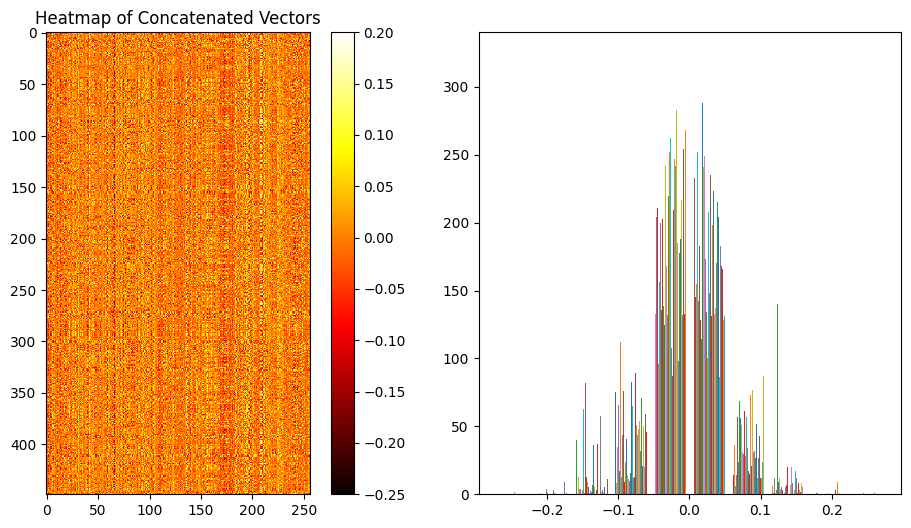

In [2]:
latent_dir = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/ddit_stage2_diff_cond/output/23999"

data, paths=get_latent(latent_dir)
vis_latent(data,norm_min=-0.25,norm_max=0.2)

# Diffusion SDF 复现

## Diffusion Stage2

0it [00:00, ?it/s]

93it [00:07, 11.78it/s]


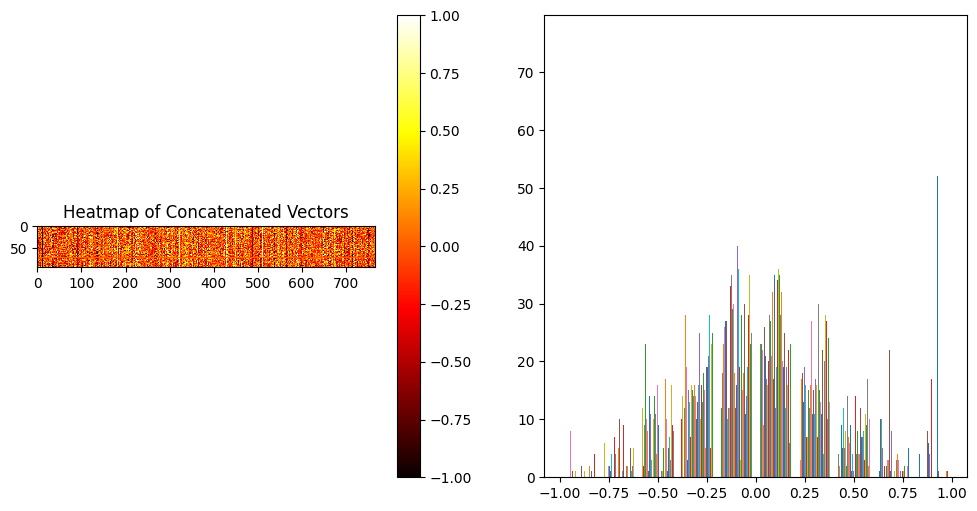

In [15]:
latent_dir = "/storage/user/lhao/hjp/ws_dditnach/Diffusion-SDF/config/repro_stage2_diff_cond/recon/canonical_mesh_manifoldplus/04256520"
latent_files = os.listdir(latent_dir)
latents = np.zeros((len(latent_files),768))

for id_, latent_file in tqdm(enumerate(latent_files)):
    latent_path = os.path.join(latent_dir, latent_file)
    if latent_file.split(".")[-1] == "txt":
        latent = np.loadtxt(latent_path)
        latents[id_,:] = latent
plt.figure(figsize=(12, 6))

# 绘制热力图
plt.subplot(1, 2, 1)  # 1行2列的第1个
plt.imshow(latents, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap of Concatenated Vectors")

plt.subplot(1,2,2)
plt.hist(latents)

plt.show()

## Modulation

200it [01:39,  2.01it/s]


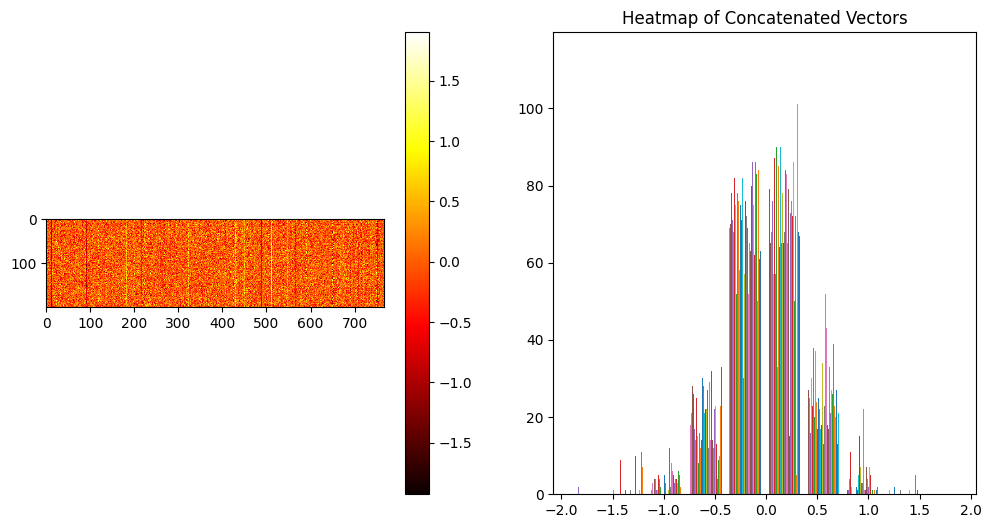

In [32]:
latent_dir = "/storage/user/lhao/hjp/ws_dditnach/Diffusion-SDF/config/repro_stage1_sdf/modulations/9999/04256520"

latent_files = os.listdir(latent_dir)

latent_files = latent_files[:200]

latents = np.zeros((len(latent_files),768))

for id_, latent_file in tqdm(enumerate(latent_files)):
    latent_path = os.path.join(latent_dir, latent_file,"latent.txt")
    latent = np.loadtxt(latent_path)
    latents[id_,:] = latent

plt.figure(figsize=(12, 6))

# 绘制热力图
plt.subplot(1, 2, 1)  # 1行2列的第1个
plt.imshow(latents, cmap='hot', interpolation='nearest')
plt.colorbar()

plt.subplot(1,2,2)
plt.hist(latents)

plt.title("Heatmap of Concatenated Vectors")

plt.show()

Text(0.5, 1.0, 'repro cond features')

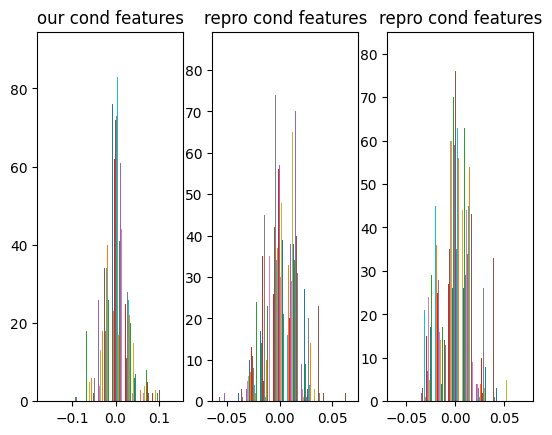

In [11]:
# compare point features of repro and scanarcw
r = np.load("/storage/user/lhao/hjp/ws_dditnach/Diffusion-SDF/test_scanarcw.npy").squeeze()
plt.subplot(1,3,1)
plt.hist(r)
plt.title("our cond features")

r2 = np.load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/repro_scanarcw.npy").squeeze()
plt.subplot(1,3,2)
plt.hist(r2)
plt.title("repro cond features")

r2 = np.load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/repro_scanarcw2.npy").squeeze()
plt.subplot(1,3,3)
plt.hist(r2)
plt.title("repro cond features")

# TSNE检查多样性

456it [00:00, 2167.92it/s]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 456 samples in 0.000s...
[t-SNE] Computed neighbors for 456 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 456 / 456
[t-SNE] Mean sigma: 0.435627
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.009548
[t-SNE] KL divergence after 1950 iterations: 0.677092


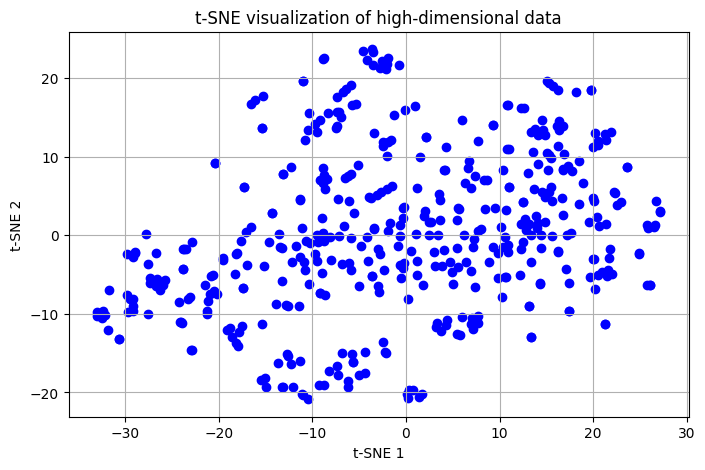

In [16]:
data = get_latent(latent_dir)

# # 假设数据
# N = 100  # 假设有100个数据点
# data = np.random.rand(N, 256)  # 生成随机数据作为示例

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(data)

# 可视化结果
plt.figure(figsize=(8, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue')
plt.title('t-SNE visualization of high-dimensional data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()